In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [12]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [13]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [14]:
X = digits.data
X.shape

(1797, 64)

In [15]:
y = digits.target
y.shape

(1797,)

In [16]:
some_digit = X[666]
y[666]

0

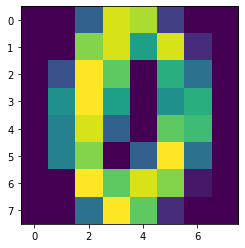

In [23]:
some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [29]:
classifier = KNeighborsClassifier(n_neighbors=6)

In [30]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [36]:
y_predict = classifier.predict(X_test)
sum(y_predict == y_test) / len(y_test)

0.9888888888888889

In [37]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9888888888888889

In [38]:
 classifier.score(X_test, y_test)

0.9888888888888889

# hyperParameter -- Find The Best K -- Grid Search

In [55]:
paramGrid = [
    {
        'weights' : ['uniform'],
        'n_neighbors' : [i for i in range(1,11)]
    },
    {
        'weights' : ['distance'],
        'n_neighbors' : [i for i in range(1,11)],
        'p' : [p for p in range(1,6)]
    }
]

In [43]:
knn_clf = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
gridSearch = GridSearchCV(knn_clf, paramGrid)

In [44]:
gridSearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}])

In [51]:
print(gridSearch.best_params_)

{'n_neighbors': 1, 'weights': 'uniform'}


In [53]:
knn_clf = gridSearch.best_estimator_
knn_clf.score(X_test, y_test)

0.9844444444444445

In [61]:
grid_search = GridSearchCV(knn_clf, paramGrid, n_jobs=-1, verbose=2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, we

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             verbose=2)